In [1]:
#!pip install opencv-python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
import matplotlib.image as matimage
import cv2
%matplotlib inline

In [3]:
# ma = []
# for i in range(2550):
#     a = 0.2*np.random.uniform()
#     b = a*255
#     ma.append(b)
    
# print(np.max(ma))

In [4]:
# a = ["Red", "Green", "Blue"]
# a[2]

In [5]:
# for i in range(11):
#     angel = np.random.uniform(30)  - 30/2
#     print(angel)

In [6]:
def brightness(imageNamefilePath):
    imageData = cv2.cvtColor(imageNamefilePath, cv2.COLOR_RGB2HSV)
    Randombright = 0.9*np.random.uniform()
    imageData[:, :,2] = imageData[:, :,2]* Randombright
    imageData  = cv2.cvtColor(imageData, cv2.COLOR_HSV2RGB)
    return imageData

In [7]:
5* 10 * np.random.uniform() - 10/2

26.058261491000604

In [8]:
def imageTransformation(imageNamefilePath, angel_range_change, shear_range_change, translation_range):
    
    
    
    # Image Angel Rotation Calculation
    angel_rotation = np.random.uniform(angel_range_change) - angel_range_change / 2
    image_hieght, image_width, color_ch = imageNamefilePath.shape
    image_metrixCalculation = cv2.getRotationMatrix2D((image_width/2, image_hieght/2), angel_rotation, 1)
    
    
    #Image Translation
    axisX = translation_range* np.random.uniform() - translation_range/2
    axisY = translation_range* np.random.uniform() - translation_range/2
    TranslatationConcatenateOrMerge = np.float32([[1, 0, axisX], [0, 1, axisY]])
    
    
    #Image Sheare range Calculation
    shear_range_changeValue = np.float32([[5, 5], [20, 5], [5, 20]])
    
    axisPoint1 = 5+ shear_range_change * np.random.uniform() - shear_range_change/2
    axisPoint2 = 20+ shear_range_change * np.random.uniform() - shear_range_change/2
    
    Points = np.float32([[axisPoint1, 5], [axisPoint2, axisPoint1], [5, axisPoint2]])
    
    shearRangeoncatenateOrMerge  = cv2.getAffineTransform(shear_range_changeValue, Points)
    
    
    image = cv2.warpAffine(imageNamefilePath, image_metrixCalculation, (image_width, image_hieght)) # unpacking
    image = cv2.warpAffine(image, TranslatationConcatenateOrMerge, (image_width, image_hieght))
    image = cv2.warpAffine(image, shearRangeoncatenateOrMerge, (image_width, image_hieght))
    
    image = brightness(image)
    
    return image

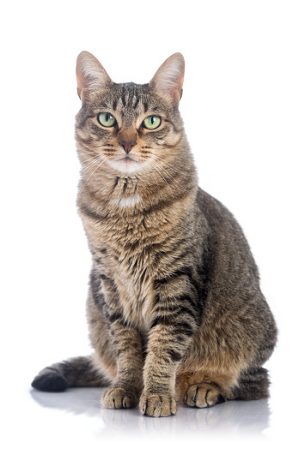

In [9]:
plt.figure(figsize=(10, 8))
imagefilePath = matimage.imread("../ImageAugmentation/ImageAugmentation.jpeg")
plt.imshow(imagefilePath)
plt.axis('off')
plt.show()

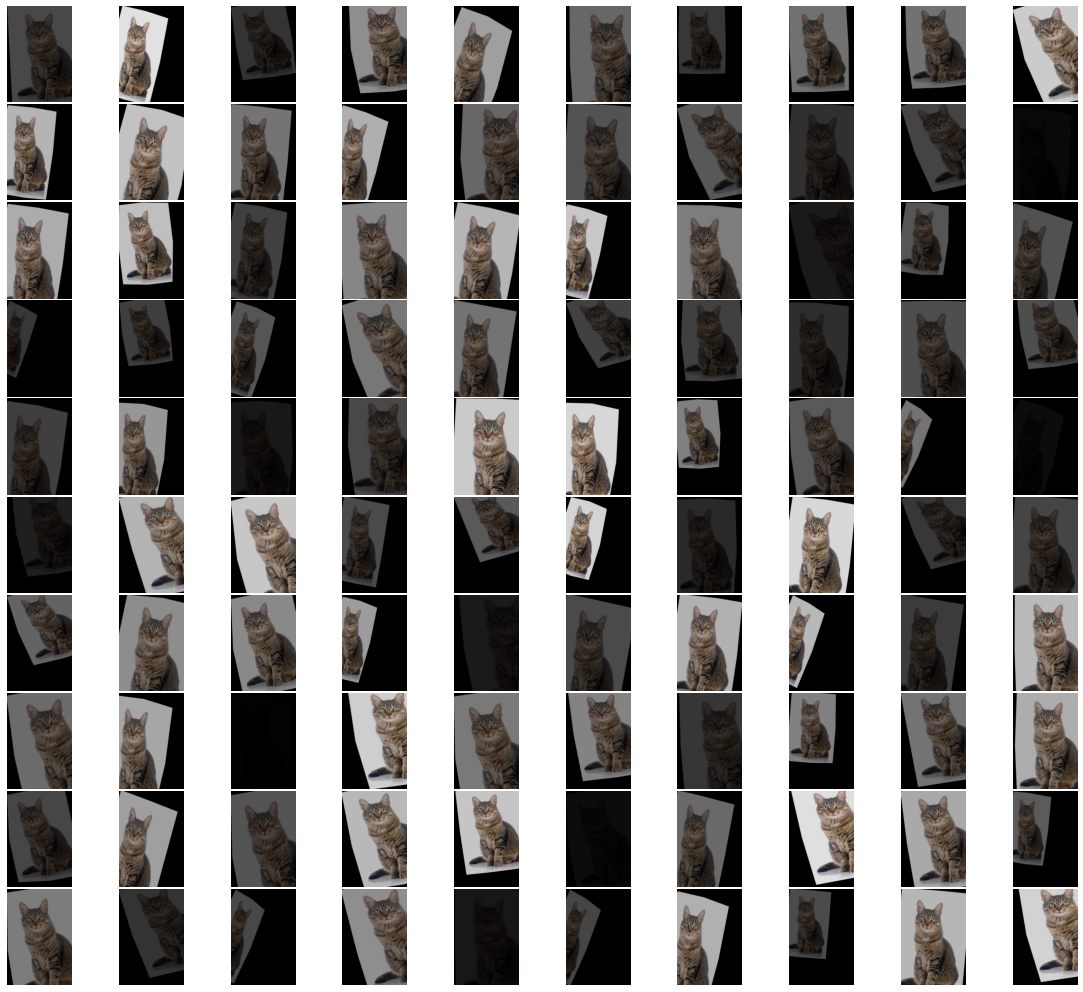

In [10]:
gridValue1 = grid.GridSpec(10, 10)
gridValue1.update(wspace = 0.01, hspace = 0.02)
plt.figure(figsize=(20,18))

for i in range(100):
    ax1 = plt.subplot(gridValue1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    image = imageTransformation(imagefilePath, 20, 10, 5)
    
    plt.subplot(10, 10, i+1)
    plt.imshow(image)
    plt.axis('off')
    
    #.save("../ImageAugmentation/Images/"+i+".png")
    
plt.show()    